<a href="https://colab.research.google.com/github/rawbil/models_V1/blob/main/titanic_model/csvs/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Survival in the Titanic

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore') # Ignore warnings and focus on main output

In [298]:
df = pd.read_csv('./csvs/Titanic-Dataset.csv')

# Data Cleaning

In [299]:
df.isnull().sum()
# df.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [300]:
df.drop(['Cabin', "PassengerId", "Name", "Ticket"], inplace=True, axis=1)

In [301]:
df.dropna(inplace=True)

In [302]:
df.duplicated().sum()
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


# Visualization

## Sex In Relation to Survival

In [303]:
df["Sex"].value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

In [304]:
# Survival In Relation to Sex
df[df["Sex"] == "male"]["Survived"].value_counts() # Survival Info of males

Survived
0    360
1     93
Name: count, dtype: int64

In [305]:
df[df["Sex"] == "female"]["Survived"].value_counts() # Survival Info in females

Survived
1    195
0     64
Name: count, dtype: int64

In [306]:
df.groupby(df["Sex"])["Survived"].mean()

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64

Based on the above data, we can conclude that 75% of females survived compared to 20% of males. This suggests that the survival rate among females was higher than males, attributed to the fact that females were a prority during rescue.

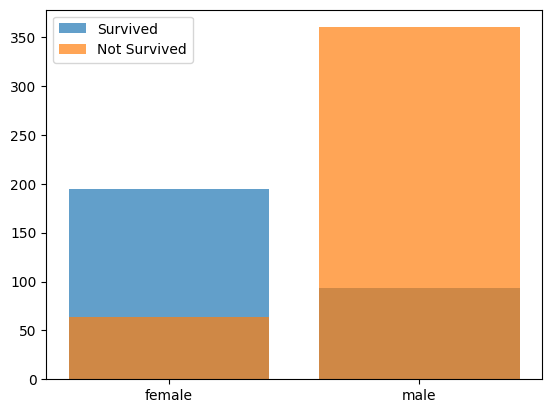

In [307]:
survival = df.loc[df["Survived"] == 1, "Sex"].value_counts()
non_survival = df.loc[df["Survived"] == 0, "Sex"].value_counts().reindex(['female', 'male'])
# non_survival.index = ['female', 'male']
# print(survival.index)

plt.bar(survival.index, survival.values, alpha=0.7, label="Survived")
plt.bar(non_survival.index, non_survival.values, alpha=0.7, label="Not Survived")
plt.legend()
plt.show()

## Survival in Relation to Age

In [308]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_group = pd.cut(df["Age"], bins=age_bins)
df.groupby(age_group)["Survived"].mean()

Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.441558
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.187500
(70, 80]    0.200000
Name: Survived, dtype: float64

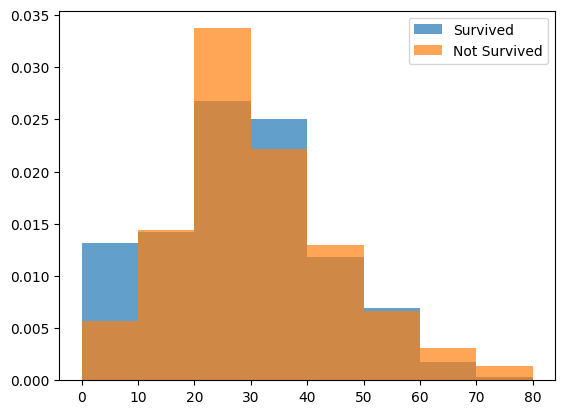

In [309]:
plt.hist(df.loc[df["Survived"] == 1, "Age"], bins=age_bins, label="Survived", alpha=0.7, density=True)
plt.hist(df.loc[df["Survived"] == 0, "Age"], bins=age_bins, label="Not Survived", alpha=0.7, density=True)
plt.legend()
plt.show()

## Survival in Relation to Embarked

In [310]:
df["Embarked"].value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

In [311]:
df.groupby(df["Embarked"])["Survived"].mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

## Survival in Comparison to Fare

In [312]:
fare_bins = [0, 100, 200, 300, 400, 500, 600]
fare_groups = pd.cut(df["Fare"], bins=fare_bins)
df.groupby(fare_groups)["Survived"].mean()

Fare
(0, 100]      0.382040
(100, 200]    0.733333
(200, 300]    0.733333
(300, 400]         NaN
(400, 500]         NaN
(500, 600]    1.000000
Name: Survived, dtype: float64

## Survival in Comparison to Family Count

In [313]:
df["FamilyCount"] = df["SibSp"] + df["Parch"] + 1

In [314]:
# df["FamilyCount"].max()

family_bin = [0, 1,2,3,4,5,6,7,8]
family_group = pd.cut(df["FamilyCount"], bins=family_bin)
df.groupby(family_group)["Survived"].mean()

FamilyCount
(0, 1]    0.318408
(1, 2]    0.546763
(2, 3]    0.569892
(3, 4]    0.777778
(4, 5]    0.272727
(5, 6]    0.136364
(6, 7]    0.333333
(7, 8]    0.000000
Name: Survived, dtype: float64

In [315]:
df.drop(["SibSp", "Parch"], inplace=True, axis=1)

In [316]:
# Convert Sex to a Numerical column
df["Sex"] = (df["Sex"] == 'male').astype(int)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyCount
0,0,3,1,22.0,7.2500,S,2
1,1,1,0,38.0,71.2833,C,2
2,1,3,0,26.0,7.9250,S,1
3,1,1,0,35.0,53.1000,S,2
4,0,3,1,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,Q,6
886,0,2,1,27.0,13.0000,S,1
887,1,1,0,19.0,30.0000,S,1
889,1,1,1,26.0,30.0000,C,1


In [317]:
# Converty Embarked to numerical columns
df = pd.get_dummies(df, columns=["Embarked"], drop_first=False, dtype=int)
df

,Survived,Pclass,Sex,Age,Fare,FamilyCount,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,2,0,0,1
1,1,1,0,38.0,71.2833,2,1,0,0
2,1,3,0,26.0,7.9250,1,0,0,1
3,1,1,0,35.0,53.1000,2,0,0,1
4,0,3,1,35.0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,6,0,1,0
886,0,2,1,27.0,13.0000,1,0,0,1
887,1,1,0,19.0,30.0000,1,0,0,1
889,1,1,1,26.0,30.0000,1,1,0,0


In [318]:
# Re-arrange the columns
cols = ["Pclass", "Sex", "Age", "Fare", "FamilyCount", "Embarked_C", "Embarked_Q", "Embarked_S", "Survived"]
df = df[cols]
df

,Pclass,Sex,Age,Fare,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,22.0,7.2500,2,0,0,1,0
1,1,0,38.0,71.2833,2,1,0,0,1
2,3,0,26.0,7.9250,1,0,0,1,1
3,1,0,35.0,53.1000,2,0,0,1,1
4,3,1,35.0,8.0500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
885,3,0,39.0,29.1250,6,0,1,0,0
886,2,1,27.0,13.0000,1,0,0,1,0
887,1,0,19.0,30.0000,1,0,0,1,1
889,1,1,26.0,30.0000,1,1,0,0,1


## Dataset Splitting

In [319]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df)) ])
train

,Pclass,Sex,Age,Fare,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Survived
641,1,0,24.0,69.3000,1,1,0,0,1
496,1,0,54.0,78.2667,2,1,0,0,1
262,1,1,52.0,79.6500,3,0,0,1,0
311,1,0,18.0,262.3750,5,1,0,0,1
551,2,1,27.0,26.0000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
757,2,1,18.0,11.5000,1,0,0,1,0
635,2,0,28.0,13.0000,1,0,0,1,1
665,2,1,32.0,73.5000,3,0,0,1,0
243,3,1,22.0,7.1250,1,0,0,1,0


# Scaling and Normalization

### min_max() scaling
- Substract the column's minimum from each value, and divide by the column's range
- The result is always between 0 and 1
- Very Sensitive to outliers
- Used if you want values between 0 and 1:
    - Neural Networks
    - Image Processing

### Standardization (Z-score Normalization)
- rescales data to have a mean of 0 and std of 1
- Centers data around 0, so we have either +ve or -ve values
- (value - mean) / std
- Used in distance-based / gradient-based models:
    - KNN
    - Logistic Regression
    - Linear Regression
    - SVM
    - Neural Networks
    - K-Means Clustering

### Models that do not require any:
- Tree-based models (Decision Trees, Random Forest, XGBoost)


In [320]:
df.describe()

,Pclass,Sex,Age,Fare,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,0.636236,29.642093,34.567251,1.946629,0.182584,0.039326,0.778090,0.404494
std,0.836854,0.481420,14.492933,52.938648,1.485027,0.386597,0.194506,0.415823,0.491139
min,1.000000,0.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.000000,8.050000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,28.000000,15.645850,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,38.000000,33.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,512.329200,8.000000,1.000000,1.000000,1.000000,1.000000


In [321]:
# Scaling
# train = train.copy()
# for col in train.columns[:-1]:
#      train[col] = (train[col] - train[col].min()) / (train[col].max() - train[col].min())
# train

In [322]:
# Standardization
# train = train.copy()
# for col in train.columns[:-1]:
#     train[col] = (train[col] - train[col].mean()) / train[col].std()
# train.describe()

### Instead of manually scaling data, we can use packages from Sklearn Library

In [323]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [324]:
train_X = train[train.columns[:-1]].values
def scale_df(dataframe,fit=True,train=train_X, sampler=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    if fit:
        X = scaler.fit_transform(X) # Standardize feature values
    else:
        scaler.fit_transform(train)
        X = scaler.transform(X)
    # Oversample to reduce imbalance
    if sampler:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # reshape y
    y = np.reshape(y, (-1, 1))
    
    data = np.hstack((X, y))
    return data, X, y

In [325]:
train, X_train, y_train = scale_df(train, sampler=True, fit=False)
validate, X_validate, y_validate = scale_df(validate, sampler=False)
test, X_test, y_test = scale_df(test)

# Models

## KNN

In [326]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [327]:
knn_model = KNeighborsClassifier() # default = 5
knn_model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [328]:
y_pred = knn_model.predict(X_validate)

In [329]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [330]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        84
           1       0.75      0.79      0.77        58

    accuracy                           0.81       142
   macro avg       0.80      0.81      0.80       142
weighted avg       0.81      0.81      0.81       142



In [331]:
print(confusion_matrix(y_validate, y_pred))

[[69 15]
 [12 46]]
